# Analyzing Census Data

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart

Some thoughts on why I like this setup and how I use it can be found in the notebook in the [example notebook](https://github.com/dmil/jupyter-quickstart/blob/master/notebook.ipynb) in my GitHub repo.

In [13]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [58]:
%%R

# My commonly used R imports
require('ggplot2')
require('ggrepel')
require('readr')
require('tidyverse')
require('extrafont')

## Get Census Data

In [59]:
# EXAMPLE PYTHON CELL

census_df = pd.read_csv('census_df.csv')
census_df = census_df.query("`congressional district` != 'ZZ'")
census_df = census_df.query("~state_abbrev.isin(['PR', 'DC'])")
census_df['congressional district'] = census_df['congressional district'].astype(int)
census_df

,NAME,Total Population,state,congressional district,state_fips,state_abbrev,pct_hispanic_or_latino,pct_asian,pct_american_indian_and_alaska_native,pct_black_or_african_american,pct_white,pct_native_hawaiian_and_other_pacific_islander,pct_some_other_race,pct_two_or_more_races,pct_below_poverty
0,"Congressional District 10 (116th Congress), Fl...",823865.0,Florida,10,12,FL,28.37,5.08,0.12,26.93,35.94,0.06,1.06,2.45,15.03
1,"Congressional District 4 (116th Congress), Flo...",800945.0,Florida,4,12,FL,8.51,4.47,0.25,9.16,74.39,0.04,0.40,2.77,8.67
2,"Congressional District 13 (116th Congress), Fl...",729991.0,Florida,13,12,FL,10.24,3.50,0.22,12.07,71.10,0.09,0.30,2.48,13.28
3,"Congressional District 26 (116th Congress), Fl...",768910.0,Florida,26,12,FL,70.93,1.72,0.08,10.19,16.01,0.02,0.30,0.74,15.23
4,"Congressional District 22 (116th Congress), Fl...",755091.0,Florida,22,12,FL,22.44,3.16,0.12,14.65,57.16,0.03,0.61,1.81,11.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,"Congressional District 11 (116th Congress), Mi...",730595.0,Michigan,11,26,MI,3.42,10.57,0.20,5.05,78.22,0.02,0.15,2.38,6.01
436,"Congressional District 8 (116th Congress), Mic...",739522.0,Michigan,8,26,MI,5.21,4.73,0.21,5.44,81.63,0.02,0.10,2.67,10.85
437,"Congressional District 2 (116th Congress), Min...",703966.0,Minnesota,2,27,MN,6.21,4.74,0.34,4.94,80.79,0.03,0.19,2.75,6.04
438,"Congressional District 1 (116th Congress), Min...",675187.0,Minnesota,1,27,MN,6.54,2.77,0.25,3.31,85.29,0.07,0.08,1.69,10.65


In [60]:
## DATA CLEANING AND UPDATING CAN GO HERE




In [61]:
census_df.to_csv('to_plot.csv', index=False)

## Exploratory Data Viz of 2019 ACS5 variables

Below is an example R cell. Notice the `%%R` at the top of the cell? That is known as cell magic. It converts the cell into an R cell rather than a python cell (which is the default).

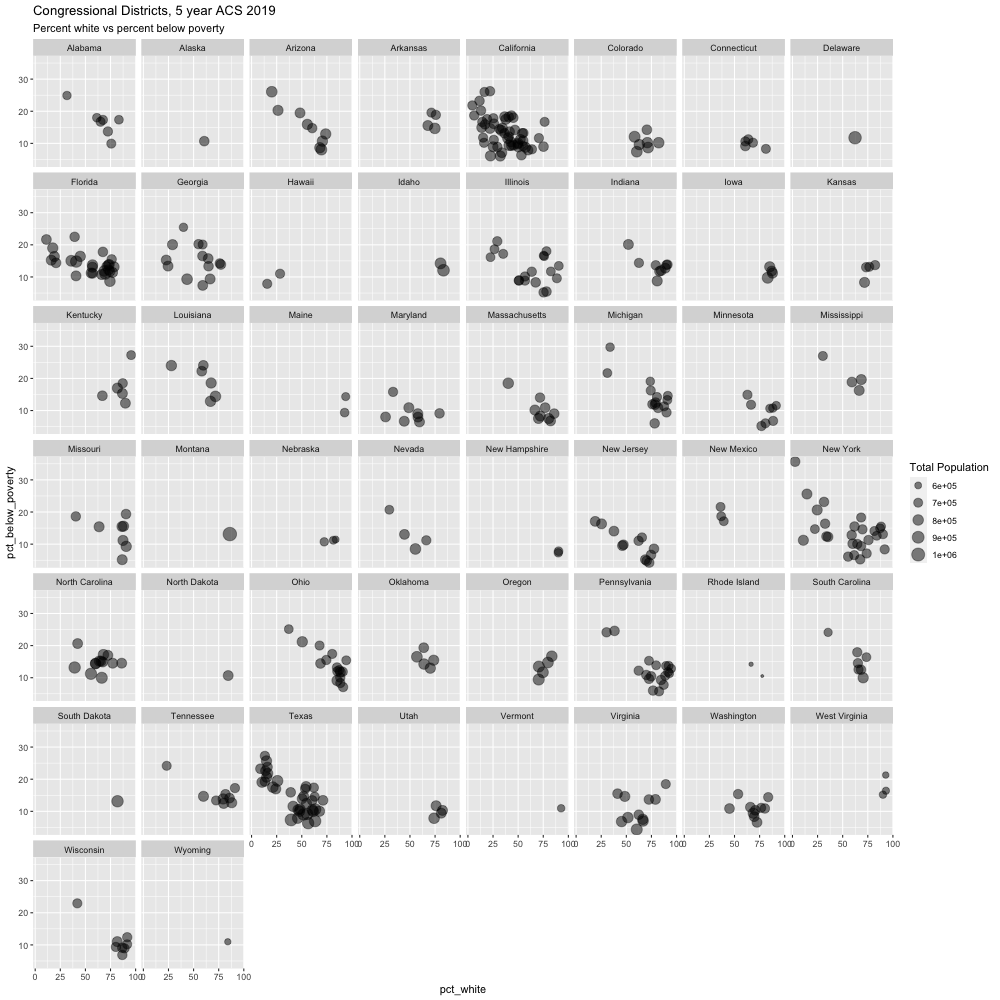

In [62]:
%%R -w 1000 -h 1000

# EXAMPLE R CELL
df <- read_csv('to_plot.csv', show_col_types = FALSE)

plt <- ggplot(df, aes(x=pct_white, y=pct_below_poverty, size=`Total Population`)) +
    geom_point(alpha=.5) + 
    labs(title="Congressional Districts, 5 year ACS 2019",
        subtitle="Percent white vs percent below poverty") +
    facet_wrap(~state)

plt

# Add 2020 election results

In [63]:
# show all columns
pd.set_option('display.max_columns', None)

In [64]:
election_results_2020 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/election-results/main/election_results_house.csv')
election_results_2020['congressional district'] = election_results_2020['office_seat_name'].str.split(' ').str[-1].str.strip().astype(int)
election_results_2020.head(2)

,id,race_id,state_abbrev,state,office_id,office_name,office_seat_name,cycle,stage,special,party,politician_id,candidate_id,candidate_name,ballot_party,votes,percent,unopposed,winner,alt_result_text,source,congressional district
0,29619,9451,FL,Florida,132,U.S. House,District 20,2022,general,True,NaN,17800.0,29062.0,Leonard L. Serratore,NPA,262.0,0.462759,NaN,False,NaN,https://results.elections.myflorida.com/Specia...,20
1,29617,9451,FL,Florida,132,U.S. House,District 20,2022,general,True,NaN,17797.0,29065.0,Sheila Cherfilus-McCormick,DEM,44707.0,78.963915,NaN,True,NaN,https://results.elections.myflorida.com/Specia...,20


In [65]:
winners_2020 = election_results_2020.query('winner==True and cycle==2020')
winners_2020 = winners_2020[['state_abbrev', 'congressional district', 'ballot_party','unopposed','candidate_name', 'percent', 'winner']]
winners_2020

,state_abbrev,congressional district,ballot_party,unopposed,candidate_name,percent,winner
71,LA,5,REP,NaN,Luke J. Letlow,62.015963,True
73,GA,5,DEM,NaN,Kwanza Hall,54.273263,True
75,CA,47,DEM,NaN,Alan Lowenthal,63.271879,True
77,CA,48,REP,NaN,Michelle Steel,51.059985,True
78,CA,50,REP,NaN,Darrell E. Issa,53.953200,True
...,...,...,...,...,...,...,...
1543,WI,7,REP,NaN,Thomas Tiffany,57.113499,True
1545,CA,25,REP,NaN,Michael Garcia,54.858706,True
1547,NY,27,REP,NaN,Christopher L. Jacobs,47.218039,True
1548,NY,27,IDP,NaN,Christopher L. Jacobs,3.869102,True


# Merge census data with elections data

In [76]:
df = census_df.merge(winners_2020, how='left', on=['state_abbrev', 'congressional district'])
df.to_csv('to_plot_combined.csv', index=False)
df

,NAME,Total Population,state,congressional district,state_fips,state_abbrev,pct_hispanic_or_latino,pct_asian,pct_american_indian_and_alaska_native,pct_black_or_african_american,pct_white,pct_native_hawaiian_and_other_pacific_islander,pct_some_other_race,pct_two_or_more_races,pct_below_poverty,ballot_party,unopposed,candidate_name,percent,winner
0,"Congressional District 10 (116th Congress), Fl...",823865.0,Florida,10,12,FL,28.37,5.08,0.12,26.93,35.94,0.06,1.06,2.45,15.03,DEM,NaN,Val Demings,63.612090,True
1,"Congressional District 4 (116th Congress), Flo...",800945.0,Florida,4,12,FL,8.51,4.47,0.25,9.16,74.39,0.04,0.40,2.77,8.67,REP,NaN,John Rutherford,61.095774,True
2,"Congressional District 13 (116th Congress), Fl...",729991.0,Florida,13,12,FL,10.24,3.50,0.22,12.07,71.10,0.09,0.30,2.48,13.28,DEM,NaN,Charlie Crist,53.039089,True
3,"Congressional District 26 (116th Congress), Fl...",768910.0,Florida,26,12,FL,70.93,1.72,0.08,10.19,16.01,0.02,0.30,0.74,15.23,REP,NaN,Carlos Giménez,51.724309,True
4,"Congressional District 22 (116th Congress), Fl...",755091.0,Florida,22,12,FL,22.44,3.16,0.12,14.65,57.16,0.03,0.61,1.81,11.15,DEM,NaN,Ted Deutch,58.601551,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,"Congressional District 11 (116th Congress), Mi...",730595.0,Michigan,11,26,MI,3.42,10.57,0.20,5.05,78.22,0.02,0.15,2.38,6.01,DEM,NaN,Haley Stevens,50.197903,True
477,"Congressional District 8 (116th Congress), Mic...",739522.0,Michigan,8,26,MI,5.21,4.73,0.21,5.44,81.63,0.02,0.10,2.67,10.85,DEM,NaN,Elissa Slotkin,50.875465,True
478,"Congressional District 2 (116th Congress), Min...",703966.0,Minnesota,2,27,MN,6.21,4.74,0.34,4.94,80.79,0.03,0.19,2.75,6.04,DEM,NaN,Angie Craig,48.180970,True
479,"Congressional District 1 (116th Congress), Min...",675187.0,Minnesota,1,27,MN,6.54,2.77,0.25,3.31,85.29,0.07,0.08,1.69,10.65,REP,NaN,Jim Hagedorn,48.591862,True


# Exploratory Data Analysis

Now you have:
- race
- pct below poverty
- population
- 2020 election winner

for every congressional district in every state

Ask questions of the data...then make plots to try and answer those questions!


In [82]:
# Your dataframe
df.head(3)

,NAME,Total Population,state,congressional district,state_fips,state_abbrev,pct_hispanic_or_latino,pct_asian,pct_american_indian_and_alaska_native,pct_black_or_african_american,pct_white,pct_native_hawaiian_and_other_pacific_islander,pct_some_other_race,pct_two_or_more_races,pct_below_poverty,ballot_party,unopposed,candidate_name,percent,winner
0,"Congressional District 10 (116th Congress), Fl...",823865.0,Florida,10,12,FL,28.37,5.08,0.12,26.93,35.94,0.06,1.06,2.45,15.03,DEM,NaN,Val Demings,63.612090,True
1,"Congressional District 4 (116th Congress), Flo...",800945.0,Florida,4,12,FL,8.51,4.47,0.25,9.16,74.39,0.04,0.40,2.77,8.67,REP,NaN,John Rutherford,61.095774,True
2,"Congressional District 13 (116th Congress), Fl...",729991.0,Florida,13,12,FL,10.24,3.50,0.22,12.07,71.10,0.09,0.30,2.48,13.28,DEM,NaN,Charlie Crist,53.039089,True


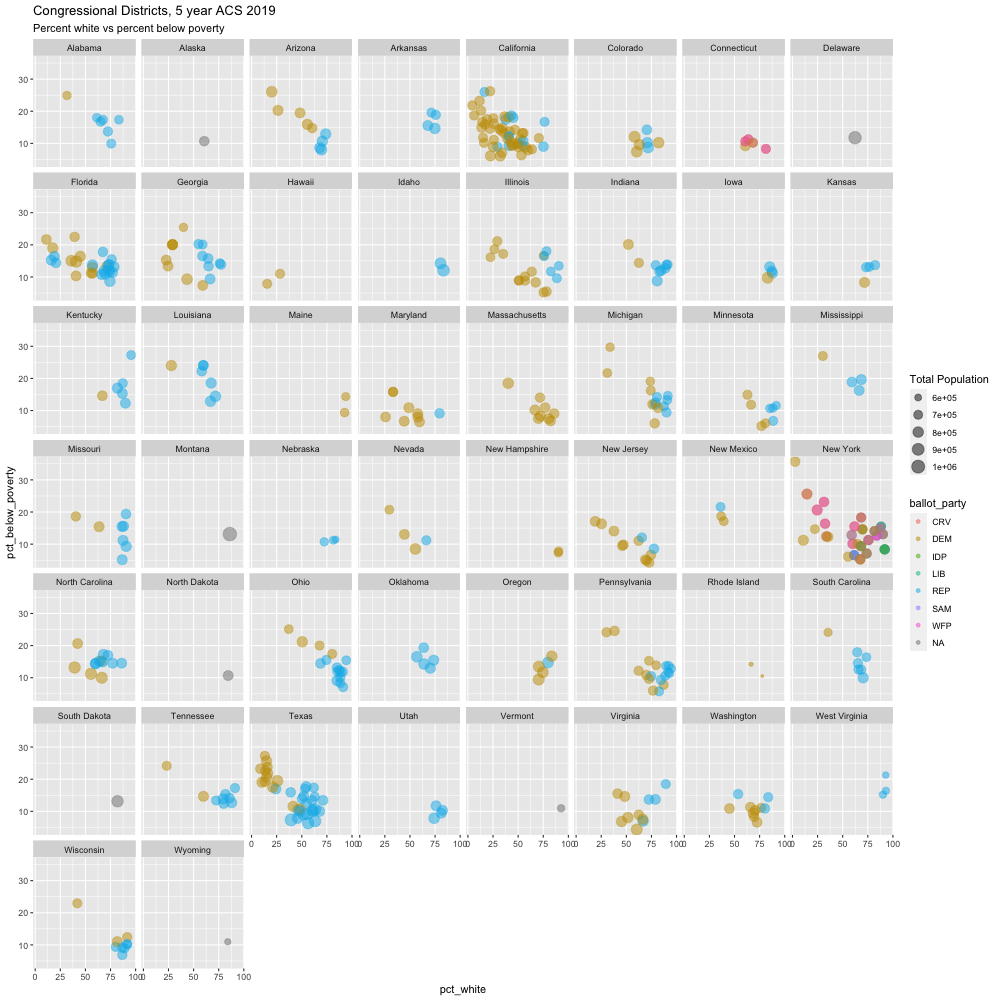

In [83]:
%%R -w 1000 -h 1000

# EXAMPLE Plot
df <- read_csv('to_plot_combined.csv', show_col_types = FALSE)

plt <- ggplot(df, aes(x=pct_white, y=pct_below_poverty, color=ballot_party, size=`Total Population`)) +
    geom_point(alpha=.5) + 
    labs(title="Congressional Districts, 5 year ACS 2019",
        subtitle="Percent white vs percent below poverty") +
    facet_wrap(~state)

plt

In [84]:
## Questions

👉 Question 1: Write your question in the cell below...then make a plot to start to explore the data and better understand how to answer the question.
    


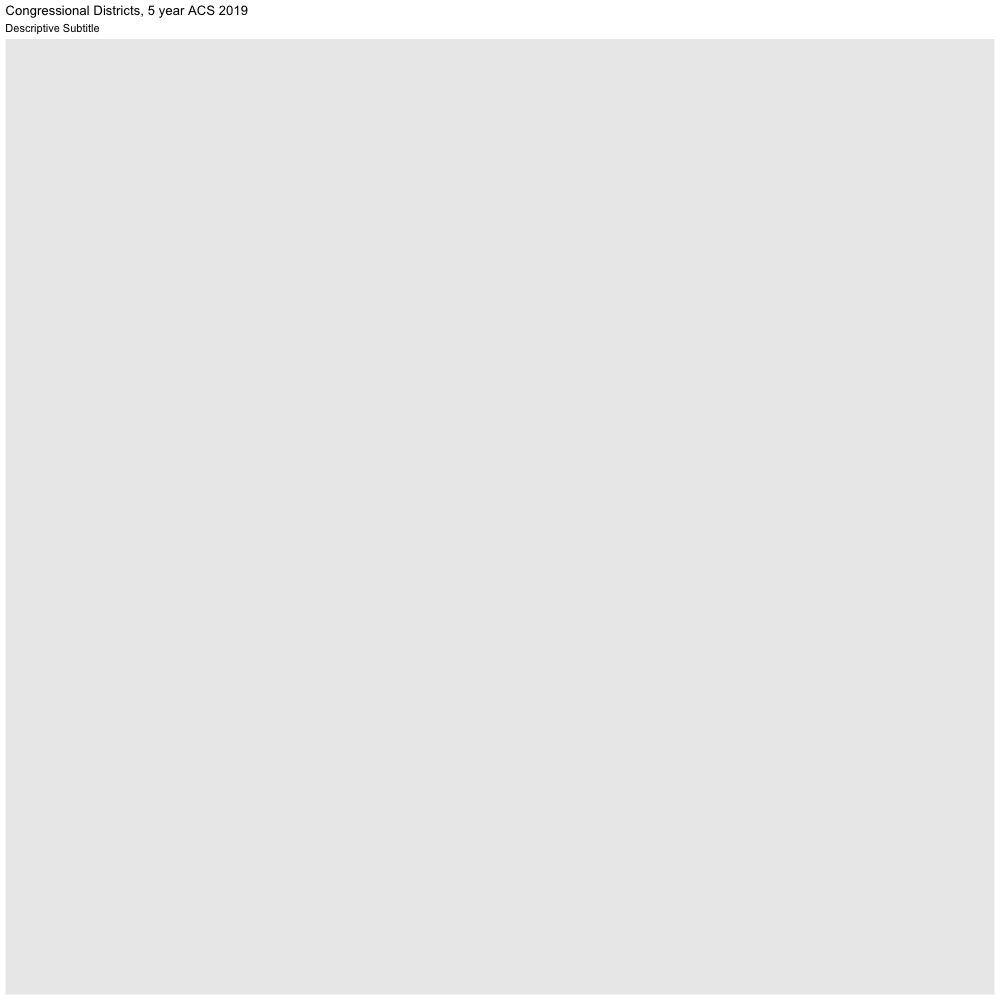

In [88]:
%%R -w 1000 -h 1000

# EXAMPLE Plot (edit this code)
df <- read_csv('to_plot_combined.csv', show_col_types = FALSE)

plt <- ggplot(df) + 
    labs(title="Congressional Districts, 5 year ACS 2019",
        subtitle="Descriptive Subtitle") 

plt

👉 Write a reader-facing sentence or two based on your exploratory data analysis. Be precise and consise. Don't draw unjustified conclusions, but give the reader some useful information.
    
